# Data Review

### First import necessary modules

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns                   
from matplotlib import pyplot as plt    
import warnings
warnings.simplefilter('ignore', category=UserWarning)  

# command below ensures matplotlib output can be included in Notebook

%matplotlib inline

### Read Data

In [133]:
df = pd.read_csv('Crystal_structure.csv')
df = df.rename(columns={"τ": "tau", "μ": "mu"}) # so that symbols appear on PDF

## Initial Exploration

In [134]:
df.head() # Gives a first look at the data

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,tau,mu,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [135]:
# Examine the target variable - 53 missing values

df['Lowest distortion'].value_counts()

Lowest distortion
cubic           3253
orthorhombic    1573
rhombohedral     323
tetragonal       127
-                 53
Name: count, dtype: int64

In [136]:
# Need to lose all entries with no assigned structure as this is the
# target variable

df = df[df['Lowest distortion'] != '-']

In [137]:
# Examine feature variables - valence of elements A and B

print(df['v(A)'].value_counts())
print(df['v(B)'].value_counts())

v(A)
-    1850
0    1213
3     933
2     884
1     222
4     146
5      28
Name: count, dtype: int64
v(B)
-    1850
0    1213
3     933
4     884
5     222
2     146
1      28
Name: count, dtype: int64


In [138]:
# A large amount of compounds with v(A) = v(B) = 0, which does not make chemical
# sense as the charges must be balanced, and a large amount with no valence
# reported, indicating no BV parameters found and therefore cannot rationalise
# the crystal structure.

df = df[df['v(A)'] != '0']
df = df[df['v(A)'] != '-']

# Notice also that v(A) and v(B) are totally correlated, e.g. where v(A) = 1
# we always have v(B) = 5 because we need charges to be balanced. We can
# therefore drop feature v(B).

df = df.drop(['v(B)'], axis=1)

# Hence all valence values are now integers - convert datatype.

df = df.astype({'v(A)': int})

In [139]:
# Examine all feature variable datatypes:

df.dtypes

Compound              object
A                     object
B                     object
In literature           bool
v(A)                   int64
r(AXII)(Å)           float64
r(AVI)(Å)            float64
r(BVI)(Å)            float64
EN(A)                float64
EN(B)                float64
l(A-O)(Å)            float64
l(B-O)(Å)            float64
ΔENR                 float64
tG                   float64
tau                   object
mu                   float64
Lowest distortion     object
dtype: object

In [140]:
# All variables are in the right datatype except the new tolerance factor, tau

In [141]:
# Look at new tolerance factor value counts:
print(df['tau'].value_counts())

tau
-              27
5.345872478     6
4.930235309     6
8.829629905     6
7.17810702      5
               ..
4.932480325     1
4.201909459     1
4.942467893     1
4.229645185     1
5.228952455     1
Name: count, Length: 1608, dtype: int64


In [142]:
# Want to look at entries which have no value given for tau
df[df['tau']=='-']

,Compound,A,B,In literature,v(A),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,tau,mu,Lowest distortion
148,Al2O3,Al,Al,False,3,0.54,0.54,0.54,1.61,1.61,2.186789,1.892894,-1.369286,0.707107,-,0.385714,cubic
161,AlCuO3,Al,Cu,False,3,0.54,0.54,0.54,1.61,1.90,2.186789,2.005574,-1.313357,0.707107,-,0.385714,cubic
222,As2O3,As,As,False,3,0.58,0.52,0.58,2.18,2.18,2.214685,1.932227,-1.234571,0.707107,-,0.414286,cubic
286,AsVO3,As,V,False,2,0.58,0.52,0.58,2.18,1.63,2.214685,1.758039,-1.348500,0.707107,-,0.414286,cubic
888,Co2O3,Co,Co,False,3,0.61,0.63,0.61,1.88,1.88,2.233563,1.930311,-1.429143,0.707107,-,0.435714,cubic
1528,GaWO3,Ga,W,False,1,0.62,0.62,0.62,1.81,2.36,2.233188,1.745600,-1.361786,0.707107,-,0.442857,cubic
1998,Ir2O3,Ir,Ir,False,3,0.68,0.63,0.68,2.20,2.20,2.311295,2.009083,-1.437714,0.707107,-,0.485714,cubic
2022,IrRuO3,Ir,Ru,False,3,0.68,0.63,0.68,2.20,2.20,2.311295,2.018753,-1.437714,0.707107,-,0.485714,cubic
2271,LuBiO3,Lu,Bi,False,3,1.03,0.86,1.03,1.27,2.02,2.500930,2.215655,-2.586036,0.707107,-,0.735714,cubic
2292,LuLaO3,Lu,La,False,3,1.03,0.86,1.03,1.27,1.10,2.500930,2.376509,-2.924464,0.707107,-,0.735714,cubic


In [143]:
# Notice that all entries with tau = '-' correspond to entries with r(AXII)(Å)
# = r(BVI)(Å) because this gives division by ln(1) = 0 which is undefined.
# Start by converting tau = '-' entries to null and all values to float.

df['tau'] = df['tau'].replace('-',np.nan)
df = df.astype({'tau': float})

# Will substitute these null values later when we start data pre-processing.

# We now have all variables in the right types:
df.dtypes

Compound              object
A                     object
B                     object
In literature           bool
v(A)                   int64
r(AXII)(Å)           float64
r(AVI)(Å)            float64
r(BVI)(Å)            float64
EN(A)                float64
EN(B)                float64
l(A-O)(Å)            float64
l(B-O)(Å)            float64
ΔENR                 float64
tG                   float64
tau                  float64
mu                   float64
Lowest distortion     object
dtype: object

In [144]:
df.describe()

,v(A),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,tau,mu
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2186.000000,2213.000000
mean,2.491188,0.970687,0.803137,0.710540,1.578965,1.708066,2.430205,2.057388,-1.944014,0.799699,2.503861,0.507530
std,0.811613,0.301986,0.209456,0.175736,0.429616,0.391343,0.210856,0.188519,0.495179,0.121059,35.371520,0.125524
min,1.000000,0.270000,0.270000,0.270000,0.790000,0.790000,1.891523,1.624662,-3.815357,0.456049,-496.866131,0.192857
25%,2.000000,0.730000,0.630000,0.600000,1.200000,1.330000,2.294004,1.955055,-2.242286,0.713939,1.609810,0.428571
50%,3.000000,0.960000,0.770000,0.680000,1.550000,1.690000,2.401381,2.027412,-1.892714,0.796653,4.141585,0.485714
75%,3.000000,1.180000,0.940000,0.860000,1.960000,2.040000,2.571812,2.215655,-1.574536,0.876812,6.660334,0.614286
max,5.000000,1.880000,1.670000,1.670000,2.360000,2.360000,3.300176,3.009747,-0.680214,1.177315,305.871348,1.192857


### Distributions of categorical values & effect on crystal structure

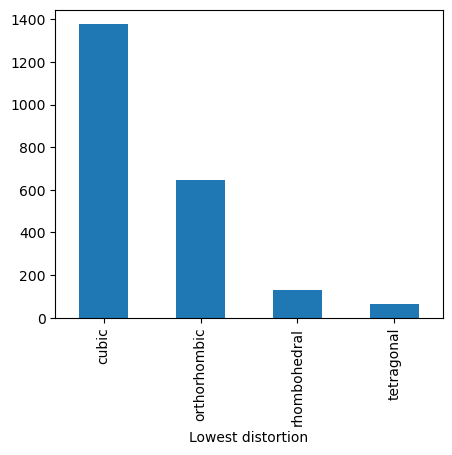

In [145]:
# Firstly look at distribution of the target variable:
df['Lowest distortion'].value_counts().plot.bar(figsize=(5, 4)) 
plt.show()

# Distribution is imbalanced - skewed towards cubic structures, only a small
# proportion are rhombohedral or tetragonal

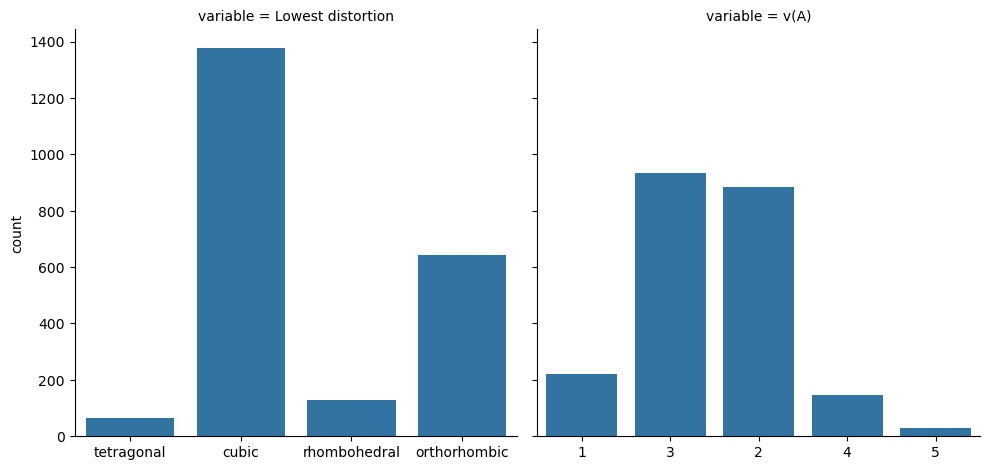

In [146]:
# Looking at distributions of structure type and of valence of A side by side
# using Seaborn catplot

data = pd.melt(df[['Lowest distortion', 'v(A)']])
g = sns.catplot(data=data, kind='count', col='variable', x='value', y=None, sharex=False)
g.set_axis_labels(x_var='')
plt.show()

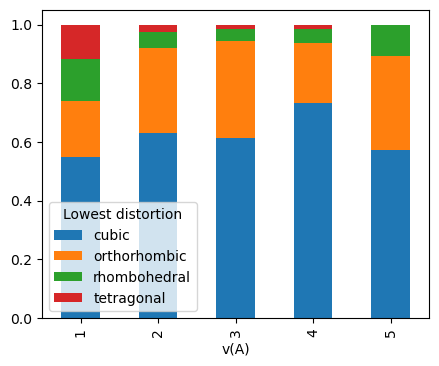

In [147]:
# Use bivariate analysis with Pandas crosstab to see if v(A) looks predictive of
# the target variable Lowest distortion

Valence = pd.crosstab(df['v(A)'],df['Lowest distortion'])
Valence = Valence.div(Valence.sum(1).astype(float), axis=0)

Valence.plot(kind="bar",stacked=True,figsize=(5, 4))
plt.show()

### Distributions of continuous variables & effect on crystal structure

#### Goldschmidt Tolerance Factor

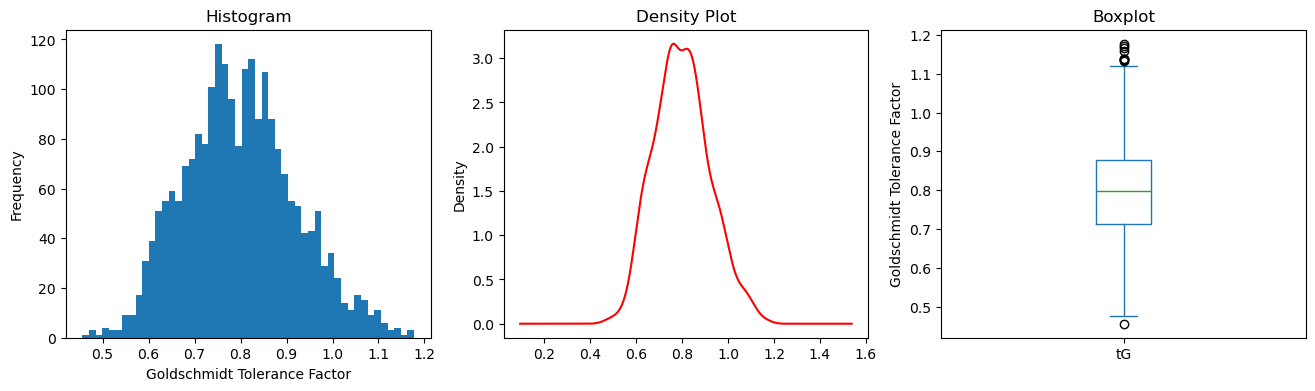

In [148]:
# Use three different kinds of plot to look at the distribution of three
# continuous variables

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
df['tG'].plot(kind='hist', bins=50, ax=axes[0], xlabel="Goldschmidt Tolerance Factor",
                           title="Histogram")
df['tG'].plot(kind='density', color='r', ax=axes[1], title='Density Plot')
df['tG'].plot(kind='box', ax=axes[2], ylabel='Goldschmidt Tolerance Factor',
                           xlabel='', title='Boxplot')
plt.show()

# Looks regular, not too many outliers

#### New Tolerance Factor

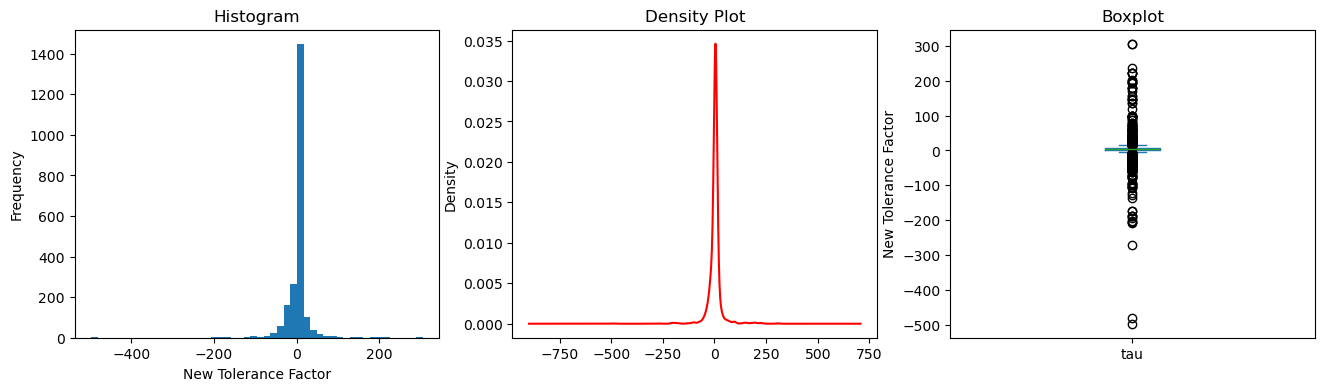

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
df['tau'].plot(kind='hist', bins=50, ax=axes[0], xlabel="New Tolerance Factor",
                           title="Histogram")
df['tau'].plot(kind='density', color='r', ax=axes[1], title='Density Plot')
df['tau'].plot(kind='box', ax=axes[2], ylabel='New Tolerance Factor',
                           xlabel='', title='Boxplot')
plt.show()

# many, many outliers

#### Octahedral Factor

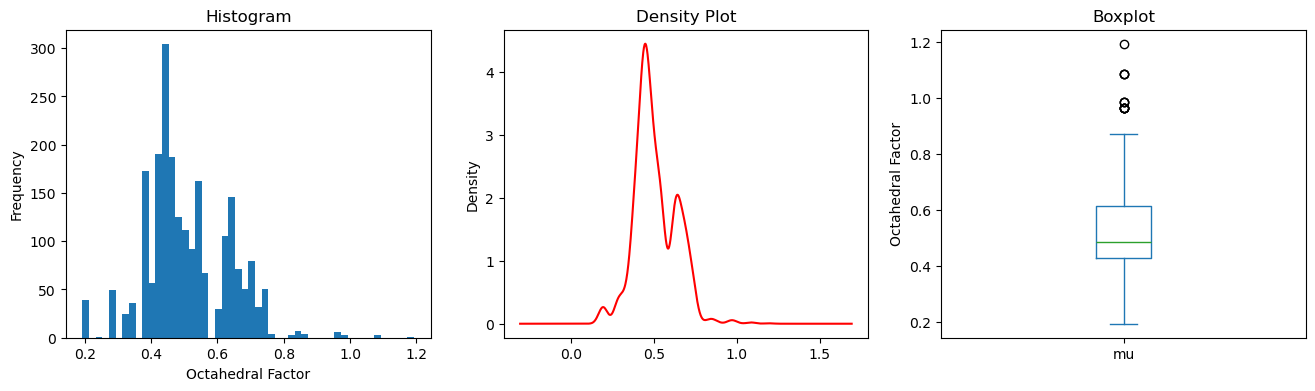

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
df['mu'].plot(kind='hist', bins=50, ax=axes[0], xlabel="Octahedral Factor",
                           title="Histogram")
df['mu'].plot(kind='density', color='r', ax=axes[1], title='Density Plot')
df['mu'].plot(kind='box', ax=axes[2], ylabel='Octahedral Factor',
                           xlabel='', title='Boxplot')
plt.show()

# Also fairly regular, not many outliers

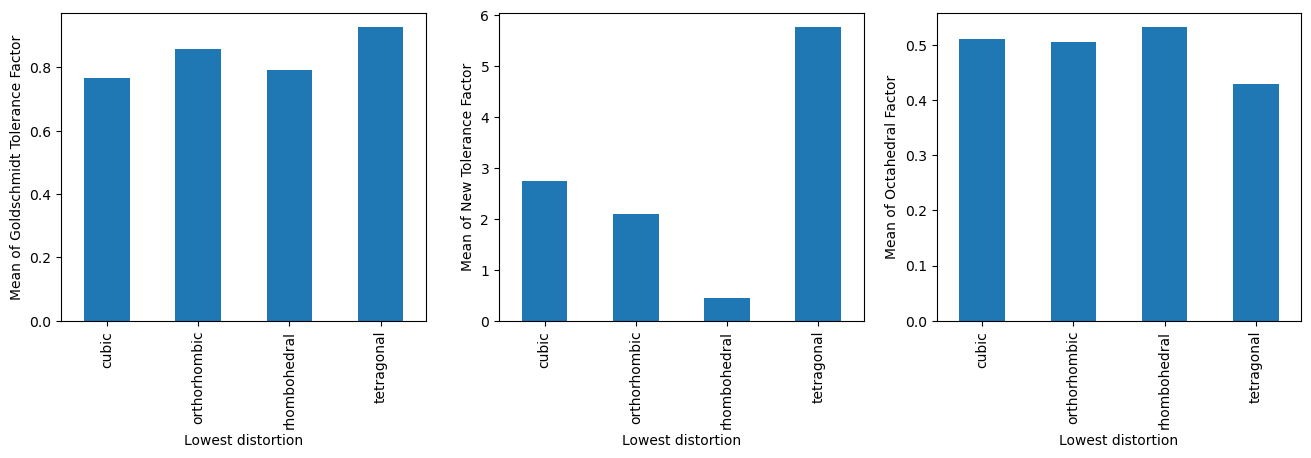

In [151]:
# Plot the mean of each of the three continuous variables grouped by target
# variable values to represent how predictive feature variables might be.

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

df.groupby('Lowest distortion')['tG'].mean().plot(kind='bar', ax=axes[0], ylabel='Mean of Goldschmidt Tolerance Factor')
df.groupby('Lowest distortion')['tau'].mean().plot(kind='bar', ax=axes[1], ylabel='Mean of New Tolerance Factor')
df.groupby('Lowest distortion')['mu'].mean().plot(kind='bar', ax=axes[2], ylabel='Mean of Octahedral Factor')

plt.show()

# New tolerance factor at the moment looks most predictive.

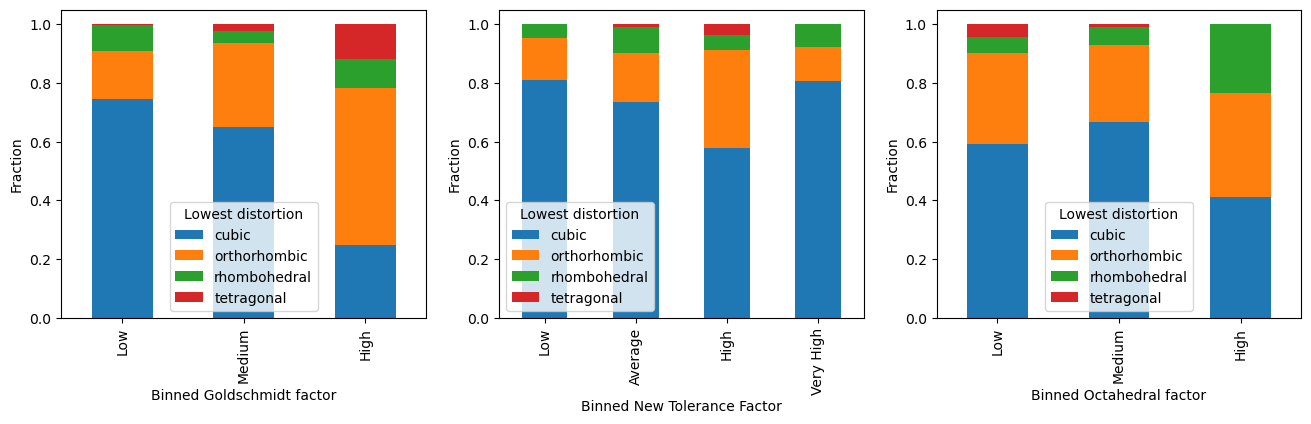

In [152]:
# Another way to represent how predictive continuous feature variables might be
# of the target variable is by discretising these continuous variables into
# 'bins'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

bins=[0,0.7,0.95,1.2]  # boundaries for the bins - chose to include 3 bins
labels=['Low','Medium','High']  # names for the bins
df['tG_bin']=pd.cut(df['tG'],bins,labels=labels) #  add discretised values as
                                                 # new column

tG_bin=pd.crosstab(df['tG_bin'],df['Lowest distortion'])  # get value
                                                          # combination counts
tG_bin = tG_bin.div(tG_bin.sum(1).astype(float), axis=0)  # normalise counts
tG_bin.plot(kind="bar",stacked=True, ax=axes[0], xlabel="Binned Goldschmidt factor", ylabel="Fraction")

bins = [-500,-100,0,100,350]  # chose to include 4 bins because of 
                              # wide range of values for tau
labels = ['Low','Average','High','Very High'] 
df['tau_bin']=pd.cut(df['tau'],bins,labels=labels) 

tau_bin=pd.crosstab(df['tau_bin'],df['Lowest distortion'])
tau_bin = tau_bin.div(tau_bin.sum(1).astype(float), axis=0) 
tau_bin.plot(kind="bar",stacked=True, ax=axes[1], xlabel="Binned New Tolerance Factor", ylabel="Fraction")

bins=[0.1,0.5,0.85,1.2] 
labels=['Low','Medium','High']  
df['mu_bin']=pd.cut(df['mu'],bins,labels=labels) 

mu_bin=pd.crosstab(df['mu_bin'],df['Lowest distortion'])
mu_bin = mu_bin.div(mu_bin.sum(1).astype(float), axis=0) 
mu_bin.plot(kind="bar",stacked=True, ax=axes[2], xlabel="Binned Octahedral factor", ylabel="Fraction")

plt.show()

## Pre-processing data using Pandas

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 76 to 5324
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Compound           2213 non-null   object  
 1   A                  2213 non-null   object  
 2   B                  2213 non-null   object  
 3   In literature      2213 non-null   bool    
 4   v(A)               2213 non-null   int64   
 5   r(AXII)(Å)         2213 non-null   float64 
 6   r(AVI)(Å)          2213 non-null   float64 
 7   r(BVI)(Å)          2213 non-null   float64 
 8   EN(A)              2213 non-null   float64 
 9   EN(B)              2213 non-null   float64 
 10  l(A-O)(Å)          2213 non-null   float64 
 11  l(B-O)(Å)          2213 non-null   float64 
 12  ΔENR               2213 non-null   float64 
 13  tG                 2213 non-null   float64 
 14  tau                2186 non-null   float64 
 15  mu                 2213 non-null   float64 
 16  Lowest dis

In [154]:
# The only variable with null values is the new tolerance factor, tau.
# As discussed, the null values correspond to entries with r(AXII)(Å) =
# r(BVI)(Å) because this gives division by ln(1) = 0, which is undefined.

# Hence decided to substitute null values with the mean value for entries
# with very small difference between r(AXII)(Å) and r(BVI)(Å),
# specifically 0.01 Å.

df['tau'] = df['tau'].fillna(df[df['r(AXII)(Å)']-0.01 == df['r(BVI)(Å)']]['tau'].mean())

# Not going to do anything about outliers or entries outside the normal
# range of tolerance factor values for stables perovskites.

# Also doesn't make sense to take log of new tolerance factor because
# lots of negative values; Goldschmidt and octahedral factors look fairly
# well distributed so no need to take log.

# Substituted values of tau will be very high so replace null values in binned
# variable with 'very high':

df['tau_bin'] = df['tau_bin'].fillna('Very High')

df_original = df.copy()

In [155]:
df.dtypes

Compound               object
A                      object
B                      object
In literature            bool
v(A)                    int64
r(AXII)(Å)            float64
r(AVI)(Å)             float64
r(BVI)(Å)             float64
EN(A)                 float64
EN(B)                 float64
l(A-O)(Å)             float64
l(B-O)(Å)             float64
ΔENR                  float64
tG                    float64
tau                   float64
mu                    float64
Lowest distortion      object
tG_bin               category
tau_bin              category
mu_bin               category
dtype: object

In [156]:
# Need to convert v(A), Lowest distortion, and bins to categorical integer
# values:

print('Structure type is originally a string variable:\n{}'.format(df['Lowest distortion'].value_counts()))
df['Lowest distortion'] = df['Lowest distortion'].astype('category').cat.codes
print('\nStructure type is converted to integer:\n{}'.format(df['Lowest distortion'].value_counts()))

df['v(A)'] = df['v(A)'].astype('category').cat.codes
df['tG_bin'] = df['tG_bin'].astype('category').cat.codes
df['tau_bin'] = df['tau_bin'].astype('category').cat.codes
df['mu_bin'] = df['mu_bin'].astype('category').cat.codes

Structure type is originally a string variable:
Lowest distortion
cubic           1376
orthorhombic     644
rhombohedral     129
tetragonal        64
Name: count, dtype: int64

Structure type is converted to integer:
Lowest distortion
0    1376
1     644
2     129
3      64
Name: count, dtype: int64


# Feature Selection

In [157]:
# Firstly drop variables which do not affect crystal structure:

cols = ['Compound', 'A', 'B', 'In literature']
df = df.drop(columns = cols, axis = 1)

## Using the Pandas Correlation Matrix

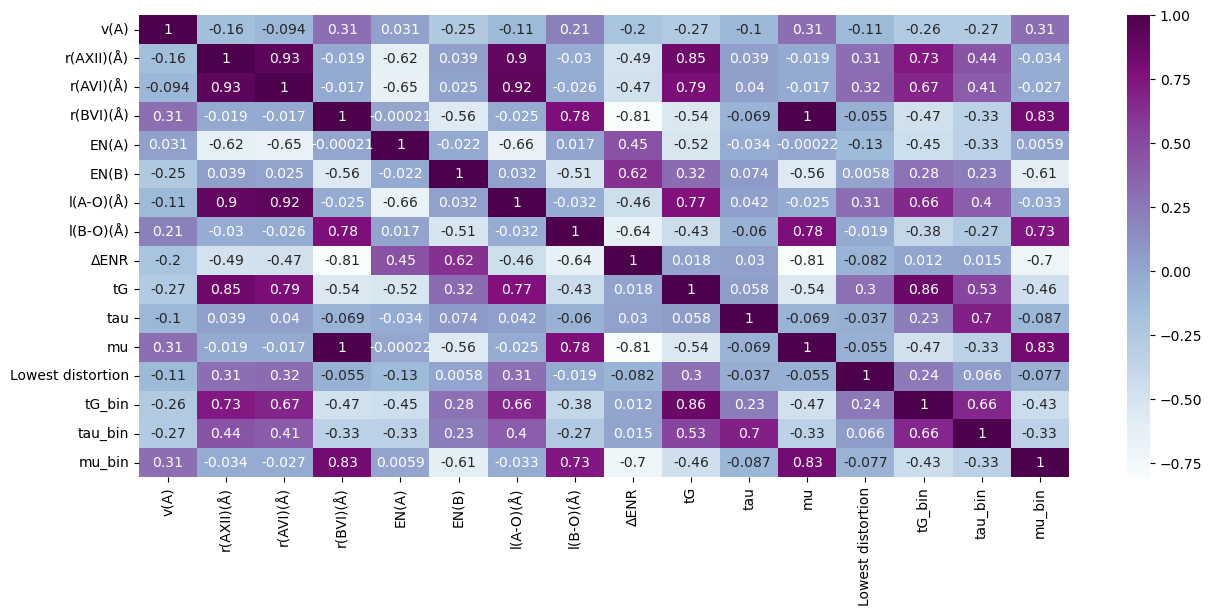

In [158]:
corr=df.corr() # gives us the correlation values
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot = True, cmap="BuPu")  # let's visualise the 
                                              # correlation matrix
plt.show()

In [159]:
# Complete correlation between mu and r(B) - makes sense given formula for mu
# so drop r(B).
# Could drop r(A)s as well since so highly correlated with I(A-O).

df = df.drop(['r(BVI)(Å)'],axis=1)

## Using Scikit-Learn

In [160]:
# Split feature variable inputs from target variable output:

X = df.drop(['Lowest distortion'],axis=1)
y = df['Lowest distortion']

In [161]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

#chi2 = SelectKBest(score_func = chi2, k = 'all').fit(X,y)
#chi2_sorted = pd.Series(data=chi2.scores_, index=X.columns).sort_values()

# chi2 doesn't work because of negative input; run the ftest and mutual
# information test under the SelectKBest method:

ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X,y)
ftest_sorted = pd.Series(data=ftest.scores_, index=X.columns).sort_values()

mitest = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(X,y)
mitest_sorted = pd.Series(data=mitest.scores_, index=X.columns).sort_values()

In [162]:
# two other alternative methods:

from sklearn.ensemble import ExtraTreesClassifier

xtrees = ExtraTreesClassifier().fit(X, y)
xtrees_sorted = pd.Series(data=xtrees.feature_importances_, index=X.columns).sort_values()

from sklearn.feature_selection import mutual_info_classif

muinfo = mutual_info_classif(X,y)
muinfo_sorted = pd.Series(data=muinfo, index=X.columns).sort_values()

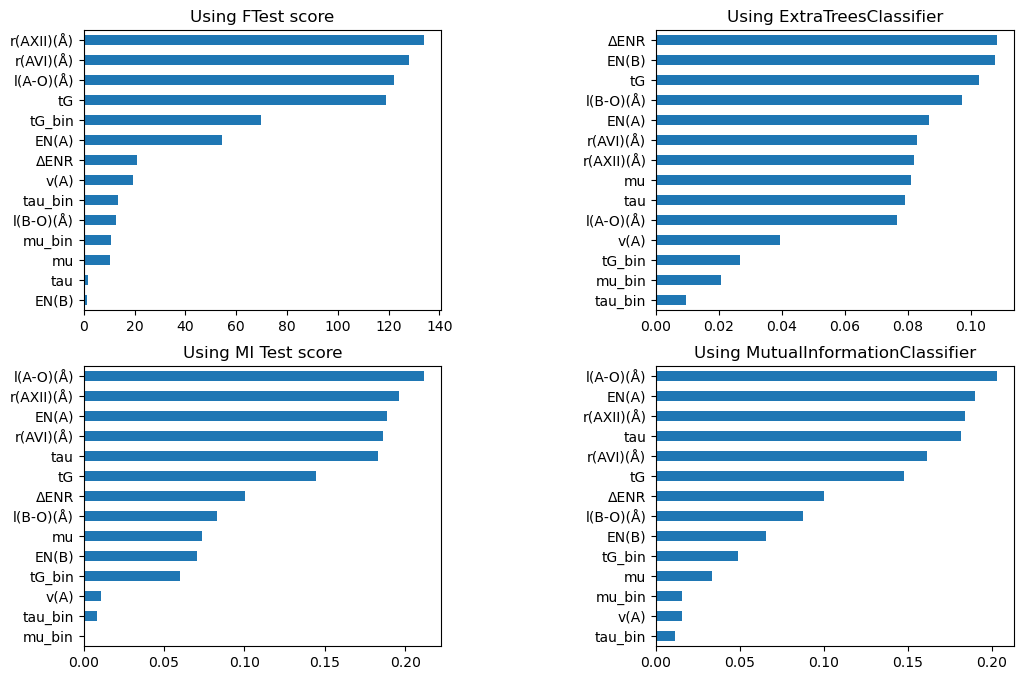

In [163]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.6)
#chi2_sorted.plot(kind='barh', ax=axes[0, 0], title='Using chi2 score')
ftest_sorted.plot(kind='barh', ax=axes[0, 0], title='Using FTest score')
xtrees_sorted.plot(kind='barh', ax=axes[0, 1], title='Using ExtraTreesClassifier')
mitest_sorted.plot(kind='barh', ax=axes[1, 0], title='Using MI Test score')
muinfo_sorted.plot(kind='barh', ax=axes[1, 1], title='Using MutualInformationClassifier')
plt.show()

In [164]:
# 3 of 4 methods show discretised/bin variables among the lowest score values
# or at least lower than the corresponding continuous variables, so will drop
# these. Also drop r(A) variables because so highly correlated with I(A-O).

cols = ['r(AXII)(Å)', 'r(AVI)(Å)', 'tG_bin', 'tau_bin', 'mu_bin']
df = df.drop(columns = cols, axis = 1)

In [165]:
df.head()

,v(A),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,tau,mu,Lowest distortion
76,0,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,4.762492,0.328571,3
78,2,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,4.341915,0.192857,0
81,0,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857,2
86,0,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,4.577636,0.350000,1
100,0,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,4.232002,0.407143,2


# Prediction and Evaluation using Scikit-Learn

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
    recall_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [167]:
def train_and_evaluate(model, X, y):
    """
        Train and evaluate a classification model on training data
        and produce accuracy metrics for a separate test set.
    """

    print('\nResults from algorithm {}:'.format(model))

    # Split data into train and test - we will use test for the final accuracy
    # metrics and not use it to train the model. This is good practice,
    # particularly when you are using cross-validation to select model
    # parameters ... that way, the characteristics of the test data don't leak
    # into the model training
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Cross-validation accuracy gives an indication of variation in accuracy
    # and a better estimate for overall accuracy than just a single estimate.
    # The mean cross-validation accuracy is therefore a better guide when
    # selecting model parameters or comparing models.
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'
          .format(np.mean(scores), np.std(scores)))

    # Fit model using all of the reserved training data ... look at training
    # accuracy which we generally expect to be better than test accuracy.

    learnt_model = model.fit(X_train, y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))
    
    # User predict() to predict target values from test feature variables, and
    # then use functions to compute evaluation metrics relevant to binary
    # outcome variable multiclass data requires us to specify the 'average'
    # parameter method for averaging the binary calculations done on each class;
    # weighted chosen as this accounts for class imbalance.

    y_pred = model.predict(X_test)
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred, average='weighted'), 
                  precision_score(y_true=y_test, y_pred=y_pred, average='weighted'),
                  recall_score(y_true=y_test, y_pred=y_pred, average='weighted')))
    
    # Draw out a confusion matrix
    
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(cm,annot=True, xticklabels=['Cubic', 'Orthorhombic', 'Rhombohedral', 'Tetragonal'], cbar=False,
                     yticklabels=['Cubic', 'Orthorhombic', 'Rhombohedral', 'Tetragonal'], square=True,
                     linewidths=8.0) # plots the confusion matrix
    ax.set_xlabel('Predicted Structure Type')
    ax.set_ylabel('Actual Structure Type')
    plt.show()
    
    return learnt_model


## Logistic Regression


Results from algorithm LogisticRegression(multi_class='multinomial'):
Mean cross-validation accuracy is 0.681 with SD 0.021

Accuracy on training data is 0.689

Test data metrics: accuracy=0.682, f1=0.634, precision=0.615, recall=0.682


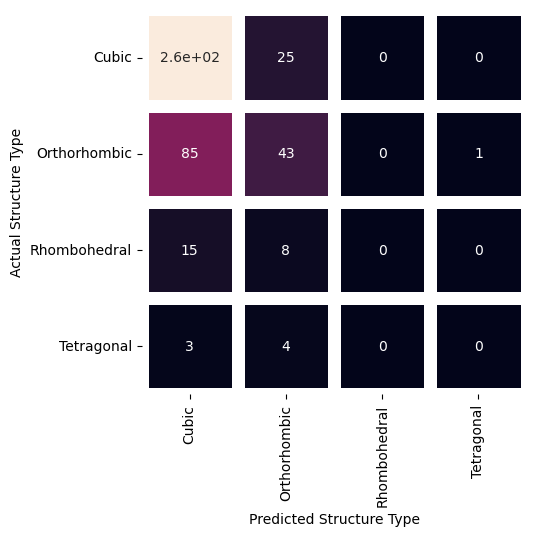

In [38]:
from sklearn.linear_model import LogisticRegression
_ = train_and_evaluate(LogisticRegression(multi_class='multinomial', solver='lbfgs'), X, y)

## Decision Tree


Results from algorithm DecisionTreeClassifier():
Mean cross-validation accuracy is 0.719 with SD 0.013

Accuracy on training data is 1.000

Test data metrics: accuracy=0.725, f1=0.735, precision=0.747, recall=0.725


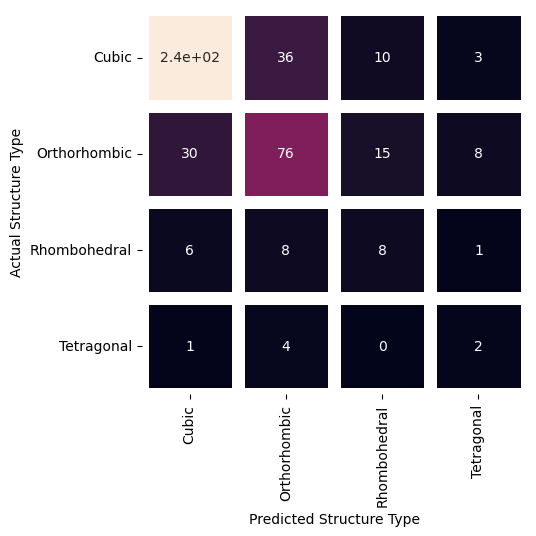

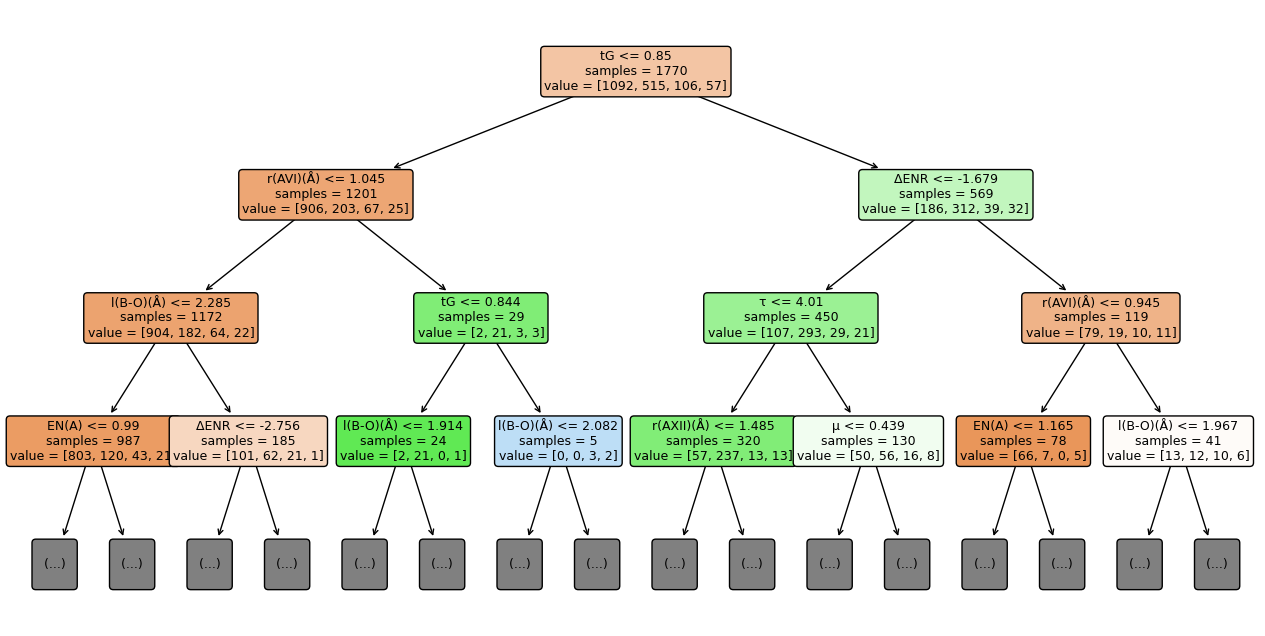

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
learnt_model = train_and_evaluate(DecisionTreeClassifier(), X, y)
plt.figure(figsize=(16, 8))
plot_tree(learnt_model, max_depth=3, feature_names=list(X.columns),
          fontsize=9, filled=True, impurity=False, rounded=True)
plt.show()

# Using Cross-Validation to Optimise Regularisation Strength Hyperparameter

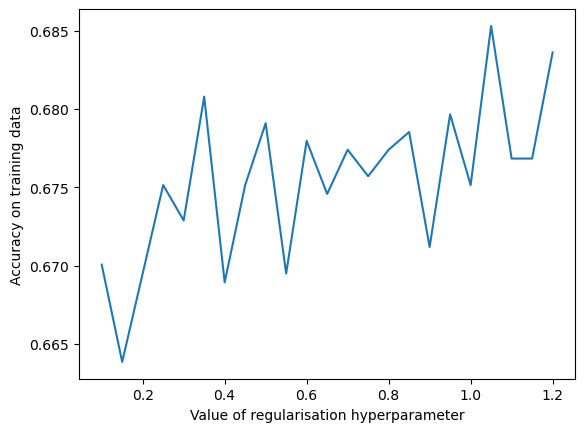

In [168]:
def train_model(algorithm, hyperparams, X, y):
    """
        Use cross-validation to determine model accuracy for a 
        specified algorithm, hyperparameters, features and target
        variables.
        
        :param Scikit-Learn class algorithm: name of constructor for algorithm
        :param dict hyperparameters: hyperparameters passed to constructor-
                                     keys must be parameters allowed for
                                     constructor
        :param array-like X: values of feature variables
        :param vector-like y: values of target variables
        
        :returns tuple: mean accuracy across all CV folds, and trained model
    """
    # Instantiate the specified model using the specified hyperparameter values

    model = algorithm(**hyperparams)

    # Perform cross-validation over the data to get a good view of accuracy
    
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

    # Fit model to supplied data

    learnt_model = model.fit(X, y)

    # return mean accuracy over all CV folds

    return (np.mean(scores), learnt_model)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's try a range of regularisation strengths 0.1, 0.15 ... 1.2

reg_values = [0.05 * i for i in range(2, 25)]
reg_accuracy = []
for reg_strength in reg_values:
    acc, _ = train_model(LogisticRegression, {'C': reg_strength}, X_train, y_train)
    reg_accuracy.append(acc)

# Plot the results

plt.plot(reg_values, reg_accuracy)
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Accuracy on training data')
plt.xlabel('Value of regularisation hyperparameter');
plt.show()


Test data metrics: accuracy=0.695, f1=0.656, precision=0.636, recall=0.695


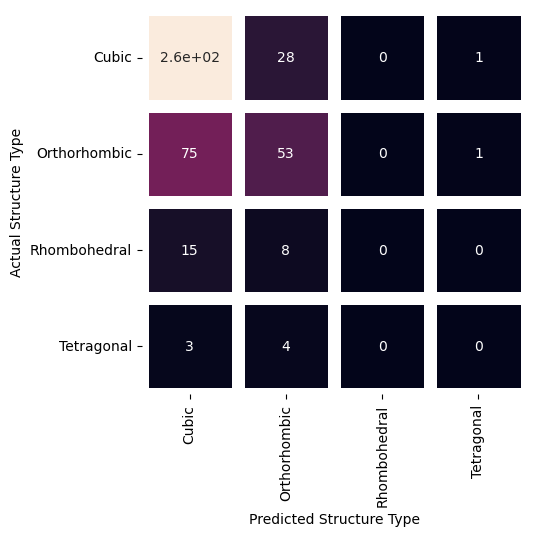

In [169]:
# train model again with the best hyperparameter value

train_accuracy, best_model = train_model(LogisticRegression, {'C': 1.05}, X_train, y_train)

# ... and check its accuracy on the test set

y_pred = best_model.predict(X_test)
print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
      .format(accuracy_score(y_true=y_test, y_pred=y_pred),
              f1_score(y_true=y_test, y_pred=y_pred, average='weighted'),
              precision_score(y_true=y_test, y_pred=y_pred, average='weighted'),
              recall_score(y_true=y_test, y_pred=y_pred, average='weighted')))
    
# Draw out a confusion matrix
    
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm,annot=True, xticklabels=['Cubic', 'Orthorhombic', 'Rhombohedral', 'Tetragonal'], cbar=False,
                 yticklabels=['Cubic', 'Orthorhombic', 'Rhombohedral', 'Tetragonal'], square=True,
                 linewidths=8.0) # plots the confusion matrix
ax.set_xlabel('Predicted Structure Type')
ax.set_ylabel('Actual Structure Type')
plt.show()

# Feature Reduction using PCA

In [170]:
# Revert to original form of dataframe:
df = df_original.copy()
df = df.drop(['Compound', 'A', 'B', 'In literature', 'tG_bin', 'tau_bin', 'mu_bin'], axis = 'columns')

In [171]:
df.head()

,v(A),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,tau,mu,Lowest distortion
76,1,1.28,0.95,0.46,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,4.762492,0.328571,tetragonal
78,3,0.75,0.95,0.27,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,4.341915,0.192857,cubic
81,1,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857,rhombohedral
86,1,1.28,0.95,0.49,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,4.577636,0.350000,orthorhombic
100,1,1.28,0.95,0.57,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,4.232002,0.407143,rhombohedral


In [172]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
cols = ['v(A)','r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 
        'ΔENR','tG', 'tau', 'mu', 'Lowest distortion']
le = LabelEncoder()                       # initialise the necessary function
                                          # taken from the LabelEncoder library
for col in cols:                          # iterate over all variables in cols
    df[col] = le.fit_transform(df[col])   # convert categorical values into
                                          # integer values

X = df.drop(['Lowest distortion'],axis=1)
y = df['Lowest distortion']

print(X.head())

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


     v(A)  r(AXII)(Å)  r(AVI)(Å)  r(BVI)(Å)  EN(A)  EN(B)  l(A-O)(Å)  \
76      0          54         29          4     40     49         58   
78      2          19         29          0     40     45         58   
81      0          54         29         29     40     44         58   
86      0          54         29          6     40     32         58   
100     0          54         29         11     40     50         58   

     l(B-O)(Å)  ΔENR    tG  tau  mu  
76          10  1866  1352  993   4  
78           0  2061  1150  889   0  
81          37   896  1061  803  28  
86          13  1395  1329  954   6  
100         19  1570  1258  861  10  


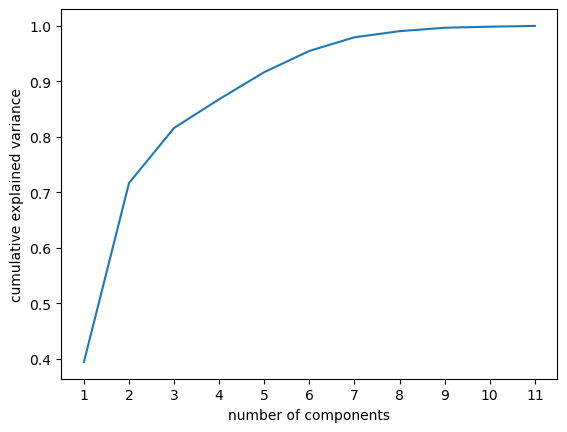

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11).fit(X) # plot variance in first 11 components
plt.plot(range(1,12), np.cumsum(pca.explained_variance_ratio_))
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,12))  
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

# Curve flattens after around 7 components.

## Logistic Regression


PCA reduces features from (2213, 12) to (2213, 7)

Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.707 with SD 0.014

Accuracy on training data is 0.710

Test data metrics: accuracy=0.709, f1=0.678, precision=0.653, recall=0.709


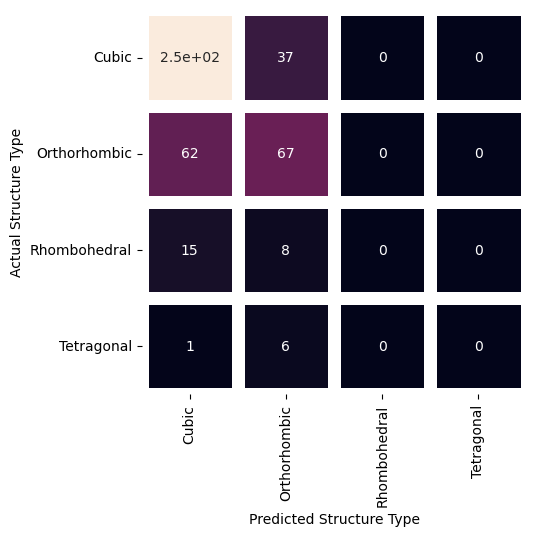

In [46]:
pca = PCA(n_components=7).fit(X)
X_reduc = pca.transform(X)
print('\nPCA reduces features from {} to {}'.format(X.shape, X_reduc.shape))
learnt_model = train_and_evaluate(LogisticRegression(), X_reduc, y)

## Decision Tree


PCA reduces features from (2213, 12) to (2213, 7)

Results from algorithm DecisionTreeClassifier():
Mean cross-validation accuracy is 0.702 with SD 0.024

Accuracy on training data is 1.000

Test data metrics: accuracy=0.695, f1=0.709, precision=0.724, recall=0.695


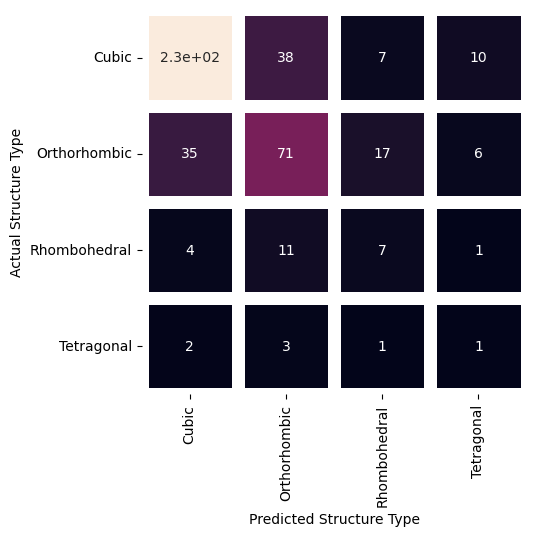

In [47]:
a = PCA(n_components=7).fit(X)
X_reduc = pca.transform(X)
print('\nPCA reduces features from {} to {}'.format(X.shape, X_reduc.shape))
learnt_model = train_and_evaluate(DecisionTreeClassifier(), X_reduc, y)